# Your Uni : SC5570, , YZ4877
# Your Full name : Haley Chen, Julia Hu, Yongjun Zhu
# Link to your Public Github repository with Final report  : Fill here


### Submission Due Date: 03/07/2025

# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Load datasets and merge them.
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Loading Datasets

Loading the World Happiness 2023 datasets

In [ ]:
#pip install ace_tools_open

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ace_tools_open as tools

# Load the dataset
whr_df = pd.read_csv('WHR_2023.csv')

# Inspect the first few rows to understand the structure
whr_df


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [ ]:
# Convert the regression target ('happiness_score') into classification labels
# We'll use quartiles to create 5 happiness categories: Very Low, Low, Average High, Very High

# Define quartiles
whr_df['happiness_category'] = pd.qcut(whr_df['happiness_score'],
                                       q=5,
                                       labels=['Very Low', 'Low','Average', 'High', 'Very High'])

# Select features and target
X = whr_df.drop(columns=['happiness_score', 'happiness_category'])
y = whr_df['happiness_category']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Convert y_train and y_test to numerical labels
y_train_labels = y_train.astype('category').cat.codes
# y_test_labels = ## Complete in a similar manner as above
y_test_labels = y_test.astype('category').cat.codes

Write in the next cell what the y_train.astype('category').cat.codes line does. What is the difference between y_train_labels and y_train?

*The line codes converts categorical labels to numberical codes. The main difference between y_train_labels and y_train is that the data type of y_train_labels is numerical while  y_train is categorical.*


<h3> Add new data

In [ ]:
# Truncated and cleaned up region data to merge
countrydata=pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
# Merge in new data to X_train and X_test by taking "country" from first table and "country_name" from 2nd table.
# Also check which countries are common in both the datasets, and which type of merge will you perform for the best results.
# Hint: Look on the 'how' parameter of megre function of pandas.

X_train = X_train.merge(countrydata, left_on="country", right_on="country_name", how="left")
X_train.drop(columns=['country_name'], inplace=True)
X_test = X_test.merge(countrydata, left_on="country", right_on="country_name", how="left")
X_test.drop(columns=['country_name'], inplace=True)

In [ ]:
common_countries = set(X_train["country"]).intersection(set(countrydata["country_name"]))
print("Common Countries:", len(common_countries))


Common Countries: 89


## 1.  EDA

In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

*We can easily observe that except columns of country and region are categorical, all other columns are numerical.*

Find out the number and percentage of missing values in the table per column

In [ ]:
# Your code here:
print(X_train.isnull().sum())
print(X_train.isnull().sum()/len(X_train))

country                           0
region                            0
gdp_per_capita                    0
social_support                    0
healthy_life_expectancy           0
freedom_to_make_life_choices      0
generosity                        0
perceptions_of_corruption         0
population                        6
population_below_poverty_line    16
hdi                               6
life_expectancy                   7
expected_years_of_schooling       7
mean_years_of_schooling           7
gni                               7
dtype: int64
country                          0.000000
region                           0.000000
gdp_per_capita                   0.000000
social_support                   0.000000
healthy_life_expectancy          0.000000
freedom_to_make_life_choices     0.000000
generosity                       0.000000
perceptions_of_corruption        0.000000
population                       0.063158
population_below_poverty_line    0.168421
hdi                        

Plot the frequency distribution / histogram of some of the numerical features that you think are important

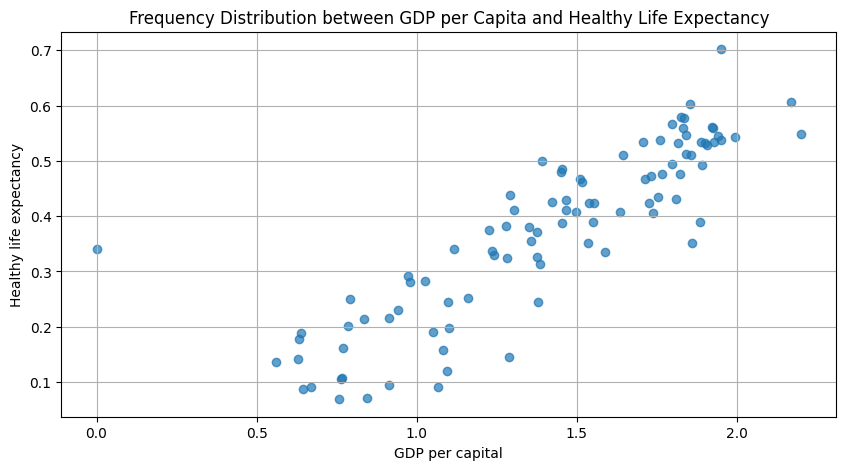

In [ ]:
# Your plotting code here:
plt.figure(figsize=(10, 5))
plt.scatter(X_train['gdp_per_capita'], X_train['healthy_life_expectancy'],alpha=0.7)
plt.xlabel('GDP per capital')
plt.ylabel('Healthy life expectancy')
plt.title('Frequency Distribution between GDP per Capita and Healthy Life Expectancy')
plt.grid(True)

Plot the categorical variables and their distribution

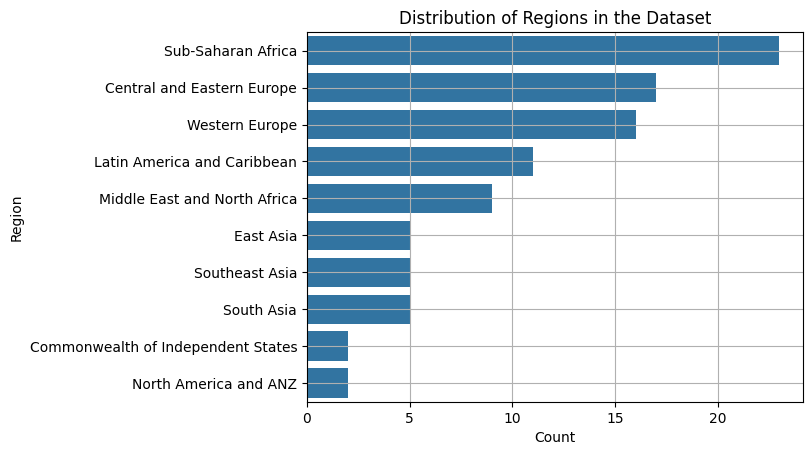

In [ ]:
# Your plotting code here:
sns.countplot(data=X_train, y="region", order=X_train['region'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Region")
plt.title("Distribution of Regions in the Dataset")
plt.grid(True)

Perform feature correlation analysis to identify relationships between variables. Use Pearson, Spearman, or Kendall correlation coefficients to analyze feature dependencies.

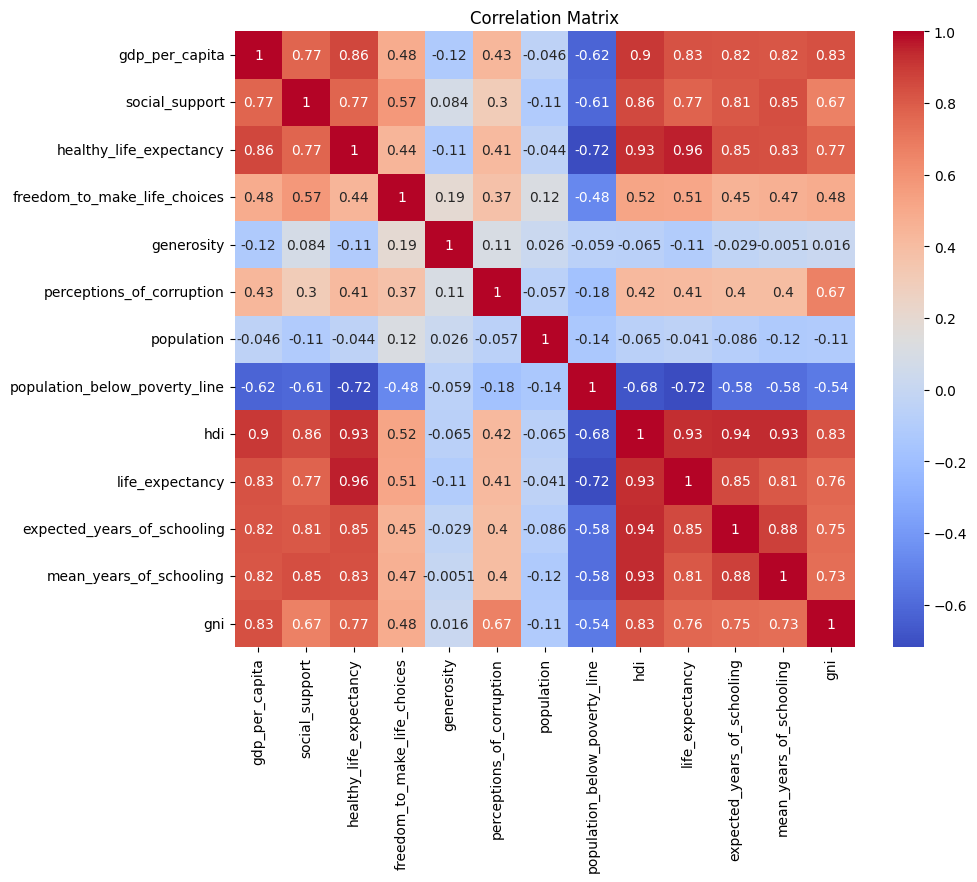

In [ ]:
# Your code here:
numerical_features = X_train.select_dtypes(include=np.number)
correlation_matrix = numerical_features.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

In [ ]:
numerical_features = X_train.select_dtypes(include=['number'])

pearson_corr = numerical_features.corrwith(whr_df['happiness_score'])

spearman_corr = numerical_features.corrwith(y_train_labels, method='spearman')

correlation_table = pd.DataFrame({'Pearson Corr': pearson_corr, 'Spearman Corr': spearman_corr})
print("Correlation Table with Target Variables:")
print(correlation_table.sort_values(by='Pearson Corr', ascending=False))


Correlation Table with Target Variables:
                               Pearson Corr  Spearman Corr
population_below_poverty_line      0.192351       0.127085
perceptions_of_corruption          0.089149       0.058748
generosity                         0.002277       0.025733
expected_years_of_schooling       -0.041455       0.074950
gni                               -0.059669      -0.029662
mean_years_of_schooling           -0.060252      -0.026189
life_expectancy                   -0.085083      -0.013312
hdi                               -0.087307       0.020882
gdp_per_capita                    -0.089836      -0.013474
freedom_to_make_life_choices      -0.098026       0.009483
population                        -0.110748      -0.232541
social_support                    -0.111778       0.048397
healthy_life_expectancy           -0.138866       0.018047


In [ ]:
print(X_train.dtypes)

country                           object
region                            object
gdp_per_capita                   float64
social_support                   float64
healthy_life_expectancy          float64
freedom_to_make_life_choices     float64
generosity                       float64
perceptions_of_corruption        float64
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Also, detect outliers using box plots, Z-score analysis, or the IQR method to identify potential data anomalies.

In [ ]:
# Your code here:
# Detect outliers using Z-score
def detect_outliers_zscore(df, threshold=3):
    z_scores = np.abs((df - df.mean()) / df.std())
    outliers = (z_scores > threshold).sum()
    return outliers

zscore_outliers = detect_outliers_zscore(X_train.select_dtypes(include=[np.number]))
print("Outliers using Z-score:")
print(zscore_outliers)

Outliers using Z-score:
gdp_per_capita                   1
social_support                   1
healthy_life_expectancy          0
freedom_to_make_life_choices     1
generosity                       1
perceptions_of_corruption        1
population                       2
population_below_poverty_line    0
hdi                              0
life_expectancy                  0
expected_years_of_schooling      0
mean_years_of_schooling          0
gni                              1
dtype: int64


Write what you observed and your General comments on what should be done:

*First of all, we can see population has the largest number of ouliers (2 using Z-score), since population size varies drastically across countries, from small island nations to highly populated countries like India and China. While, healthy life expectancy, population below poverty line, hdi, life expectancy, expected years of schooling, and mean years of schooling do have certain range, and thus no immediate concerns regarding outlier treatment in these variables.*

## 2. Feature Engineering

Apply log transformations to normalize skewed data and improve model stability (If any).

In [ ]:
# Your code here: population and gni population below

skewed_features = X_train.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)

log_transformed_df = X_train
for feature in skewed_features.index:
    if abs(skewed_features[feature]) > 1:
        log_transformed_df[feature] = np.log1p(log_transformed_df[feature])

log_skewed_features = log_transformed_df.select_dtypes(include=[np.number]).skew().sort_values(ascending=False)

skewness_comparison = pd.DataFrame({
    'Feature': skewed_features.index,
    'Original Skewness': skewed_features.values,
    'Log-Transformed Skewness': log_skewed_features.values
})
print(skewness_comparison)

                          Feature  Original Skewness  Log-Transformed Skewness
0                      population           6.058979                  1.393357
1       perceptions_of_corruption           1.600420                  0.555203
2                             gni           1.270302                  0.172724
3   population_below_poverty_line           1.074529                 -0.206557
4                      generosity           0.555203                 -0.367545
5     expected_years_of_schooling          -0.206557                 -0.414228
6         healthy_life_expectancy          -0.367545                 -0.436395
7         mean_years_of_schooling          -0.437315                 -0.437315
8                             hdi          -0.453412                 -0.453412
9                  gdp_per_capita          -0.547790                 -0.547790
10                life_expectancy          -0.632233                 -0.632233
11                 social_support          -0.954425

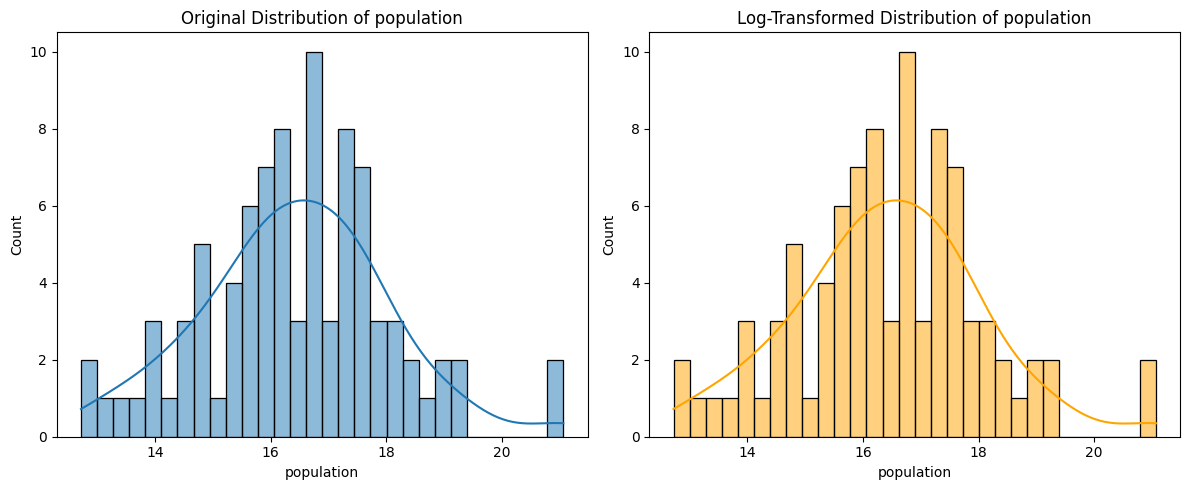

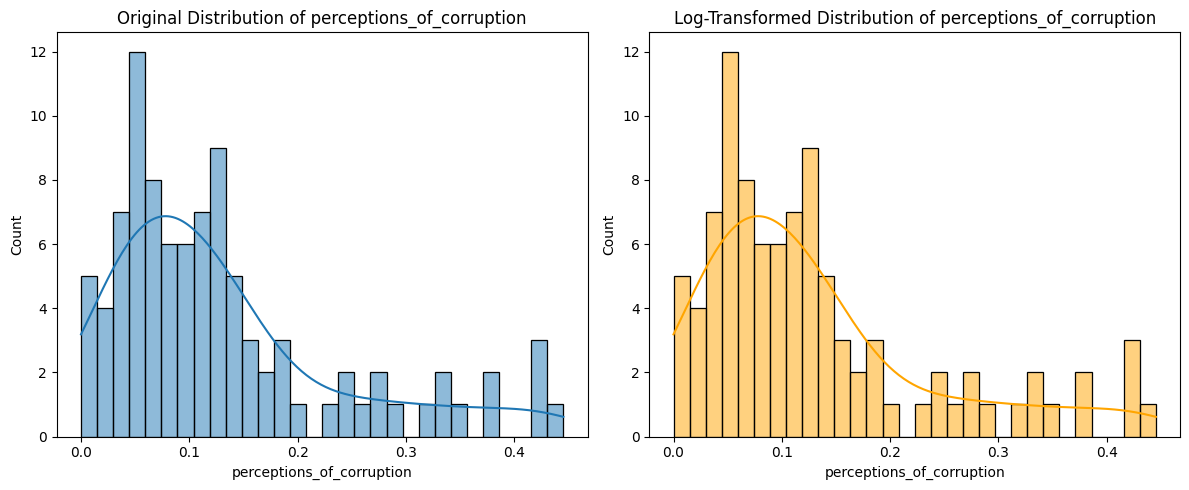

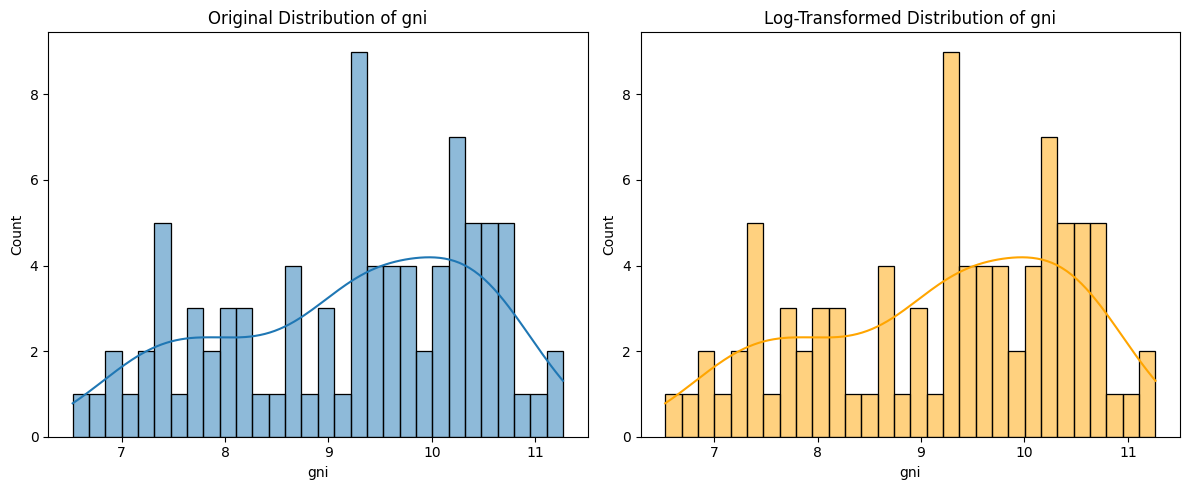

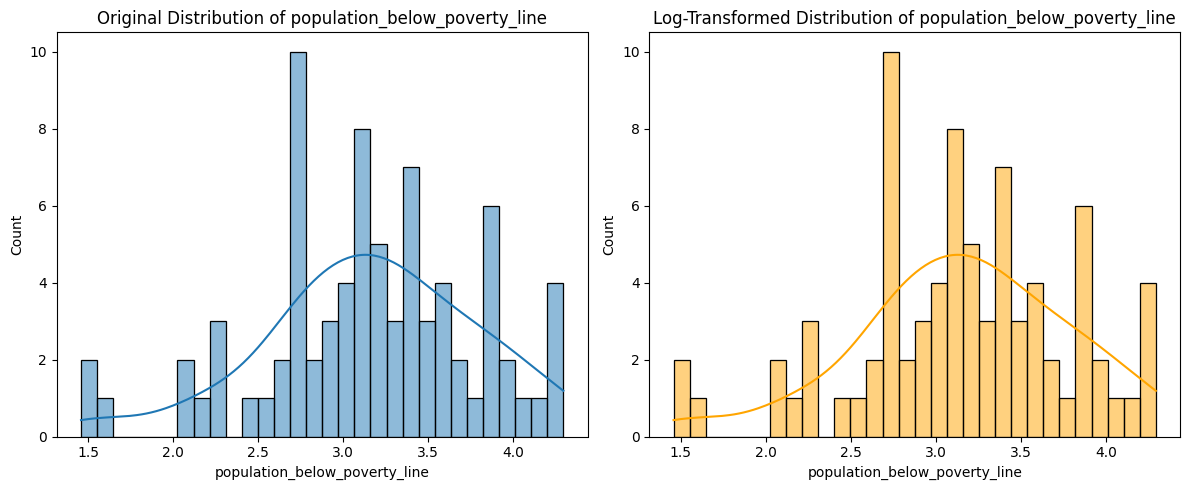

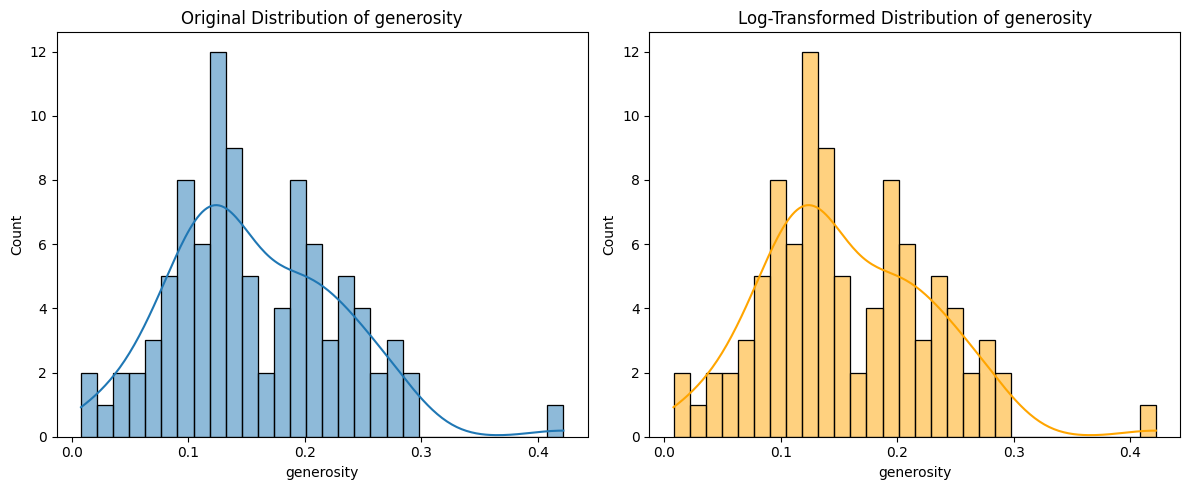

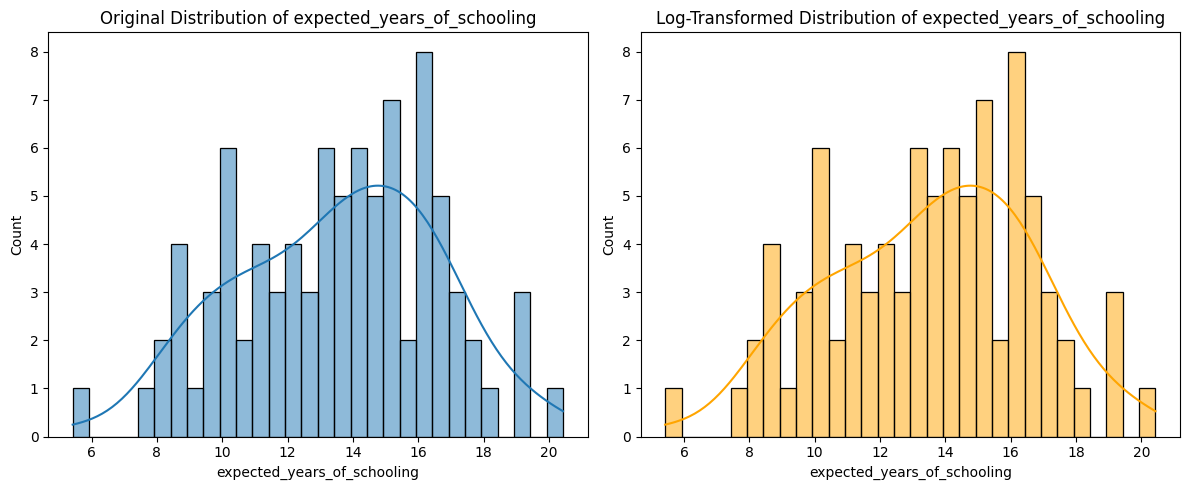

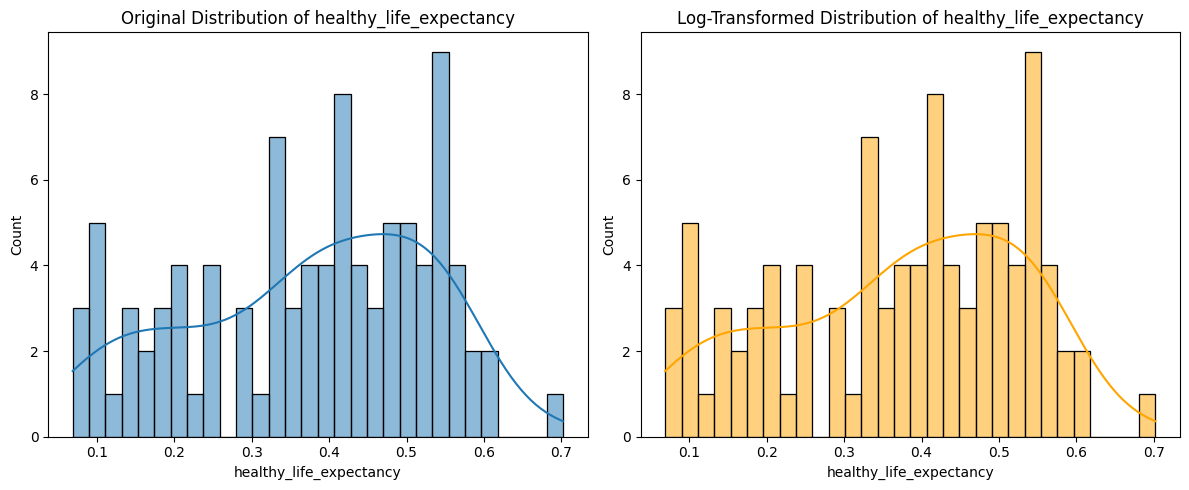

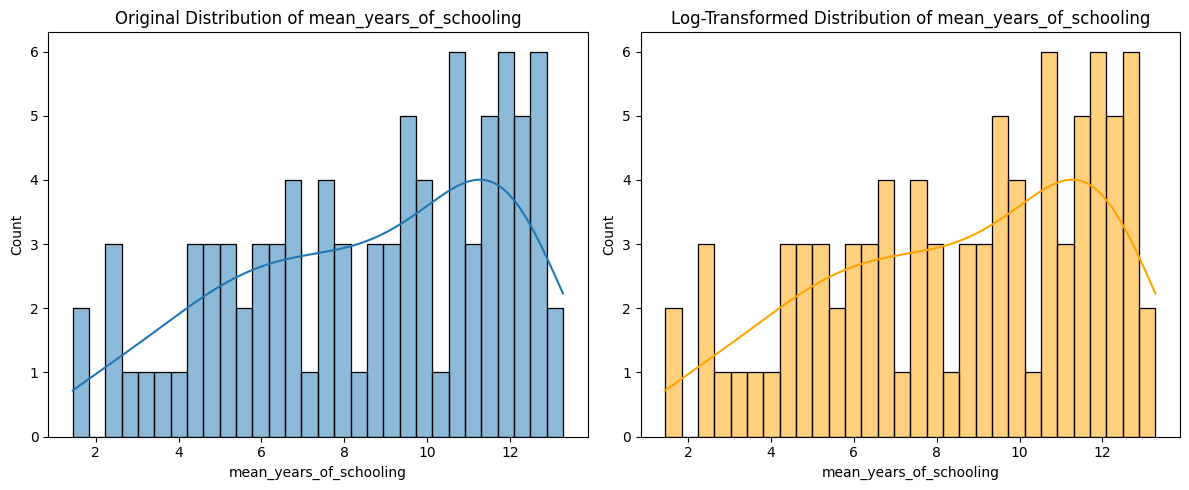

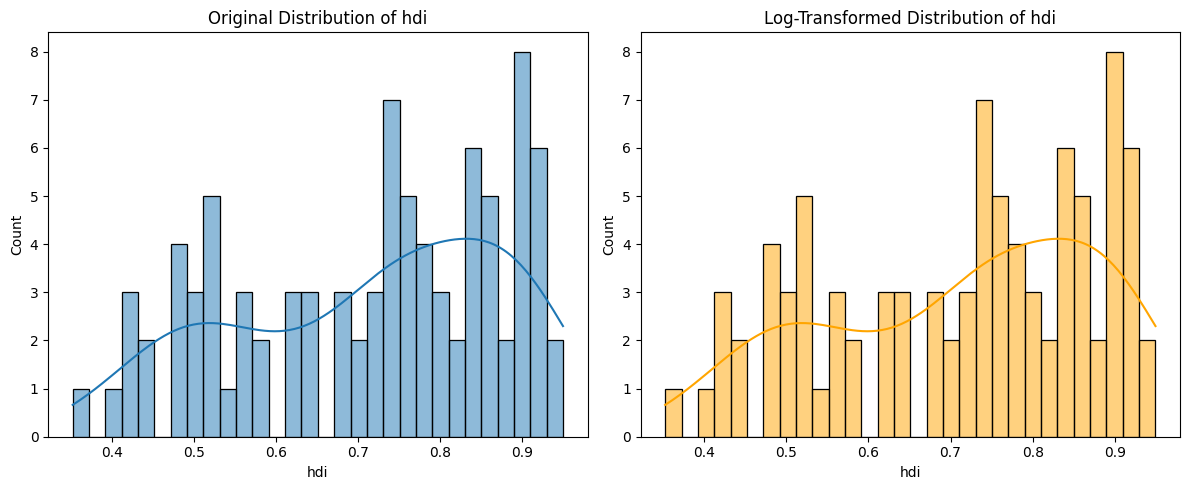

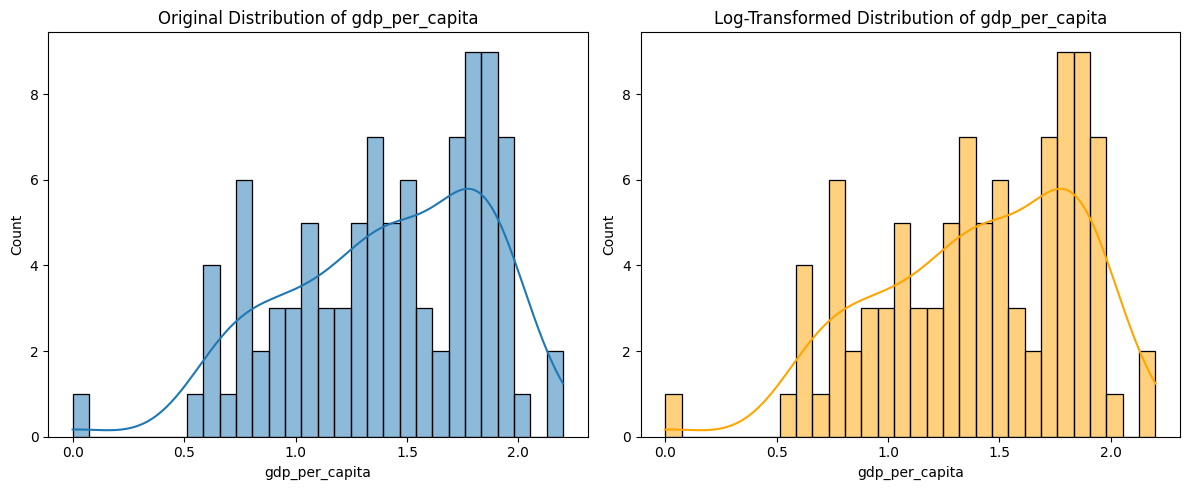

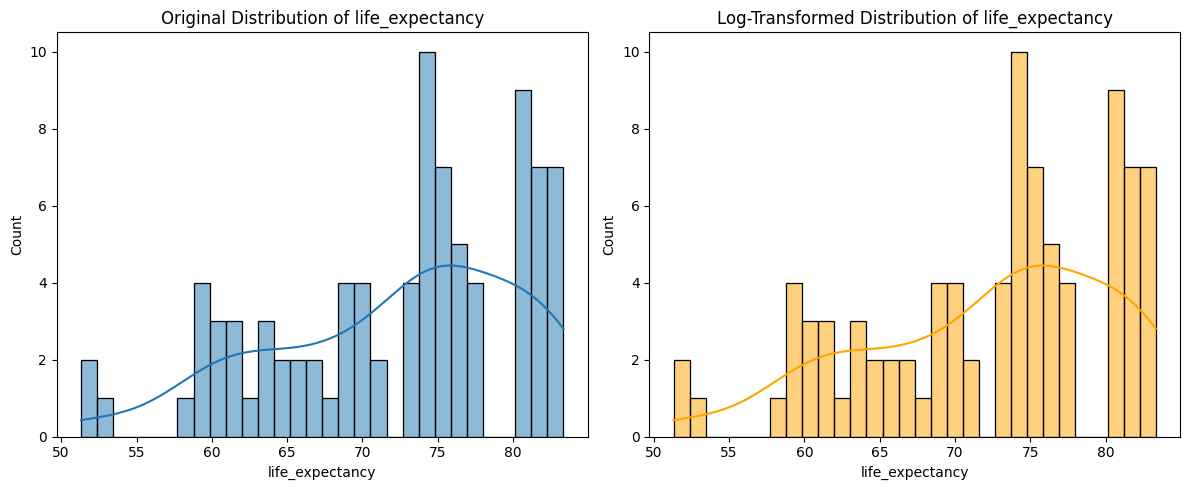

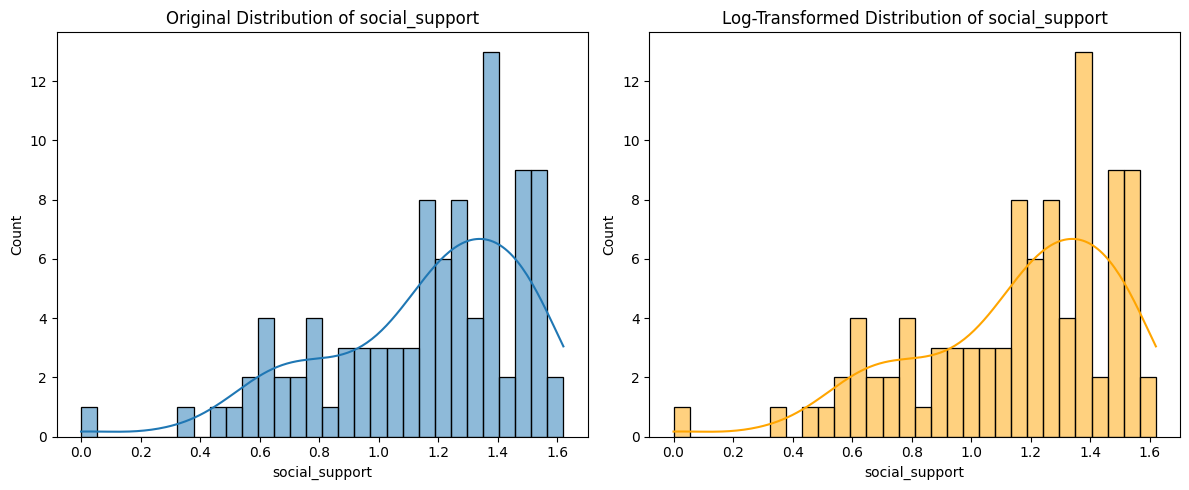

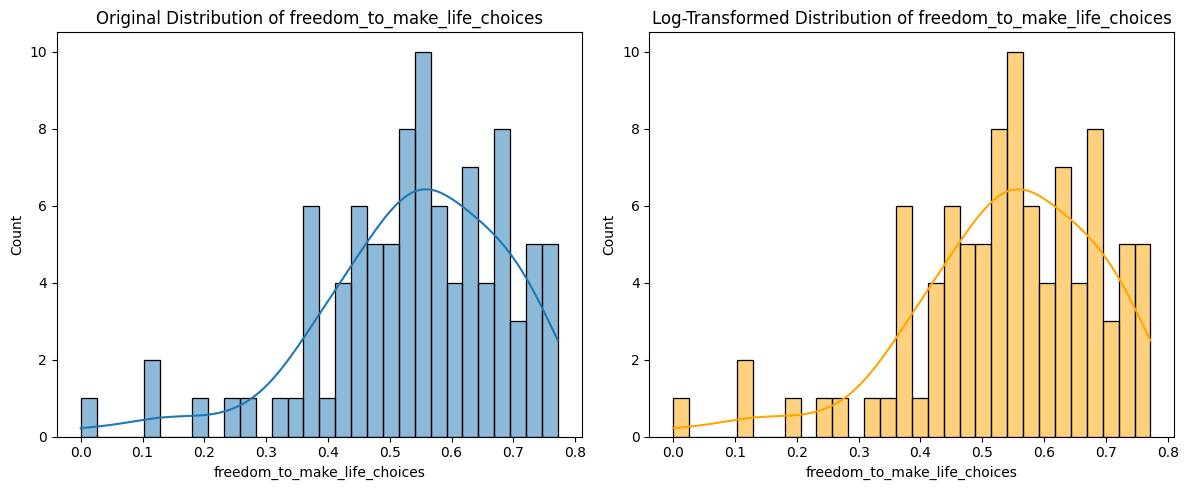

In [ ]:
features_to_plot = skewness_comparison['Feature'].tolist()

for feature in features_to_plot:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(X_train[feature], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Original Distribution of {feature}")

    sns.histplot(log_transformed_df[feature], bins=30, kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f"Log-Transformed Distribution of {feature}")

    plt.tight_layout()
    plt.show()


Create at least one interaction feature to capture relationship between existing variables, enhancing predictive power.

In [ ]:
# Your code here:
X_train['GDP'] = X_train['gdp_per_capita'] / X_train['population']
X_test['GDP'] = X_test['gdp_per_capita'] / X_test['population']
print(X_train.head(5))
print(X_test.head(5))

      country                              region  gdp_per_capita  \
0  Madagascar                  Sub-Saharan Africa           0.632   
1  Mauritania                  Sub-Saharan Africa           1.099   
2    Mongolia                           East Asia           1.379   
3  Tajikistan  Commonwealth of Independent States           0.972   
4     Ukraine          Central and Eastern Europe           1.358   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0           0.779                    0.178                         0.187   
1           0.764                    0.244                         0.320   
2           1.494                    0.244                         0.425   
3           1.248                    0.291                         0.599   
4           1.354                    0.355                         0.551   

   generosity  perceptions_of_corruption  population  \
0       0.177                   0.125751   17.056965   
1       0.130   

## 3.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
X_train.dtypes

,0
country,object
region,object
gdp_per_capita,float64
social_support,float64
healthy_life_expectancy,float64
freedom_to_make_life_choices,float64
generosity,float64
perceptions_of_corruption,float64
population,float64
population_below_poverty_line,float64


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.select_dtypes(include=[np.number]) ## Drop all the non-numerical features from X_train
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), ## Is this good enough?
    ('scaler', StandardScaler())]) # You will need to describe why this is being done in the next cell

categorical_features = ['region', 'country']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent') ),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'  ))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

*We firstly select numeric_features and categorical colunms to ensure flexibility if the dataset changes and only transform the correct columns. The original approach is to fill missing values with 0, while I change it to fill with median. Then we standardizes numerical data to have mean=0 and standard deviation = 1. This would help us perform better when features are standardized. Then we replace the missing categorical values with the most frequent category and convert categorical varibales into binary dummy variables.*

In [ ]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['country', 'region'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

*Preprocessor is a column transformer object that stores the entire preprocessing pipeline. Instead of modifying data, it just define how data will be transformed. Preprocess is the same object as preprocessor, but after preprocessor has learned from X_train. Preprocessed_data has all numerical features scaled, which is our final transformed data.*

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(95, 119)

## 4. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

X_train_processed = preprocessor(X_train)
X_test_processed = preprocessor(X_test)

model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train_processed, y_train)

y_pred = model.predict(X_test_processed)

joblib.dump(preprocess, "preprocessor.pkl")
joblib.dump(model, "random_forest_model.pkl")

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.5476


## 5. Generate predictions from X_test data and compare it with true labels in Y_test


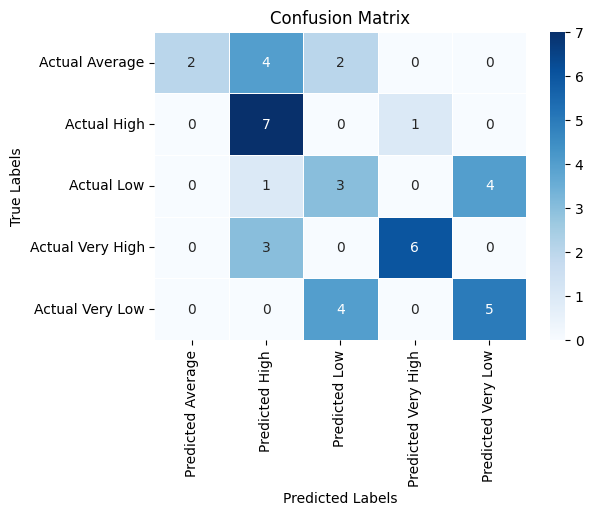


Classification Report:
              precision    recall  f1-score   support

     Average       1.00      0.25      0.40         8
        High       0.47      0.88      0.61         8
         Low       0.33      0.38      0.35         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.56      0.56      0.56         9

    accuracy                           0.55        42
   macro avg       0.64      0.54      0.53        42
weighted avg       0.65      0.55      0.54        42



In [ ]:
from sklearn.metrics import *


prediction_labels = model.predict(preprocessor(X_test))

conf_matrix = confusion_matrix(y_test, prediction_labels)

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index = [f"Actual {label}" for label in np.unique(y_test)],
    columns = [f"Predicted {label}" for label in np.unique(y_test)]
)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot = True, fmt = "d", cmap = "Blues", linewidths = 0.5)
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

In [ ]:
print(f"Number of Trees: {model.get_params()['n_estimators']}")
print(f"Max Depth: {model.get_params()['max_depth']}")
print(f"Max Features: {model.get_params()['max_features']}")
print(f"Criterion: {model.get_params()['criterion']}")

Number of Trees: 100
Max Depth: None
Max Features: sqrt
Criterion: gini


## 6. Repeat the process with different parameters to improve the accuracy


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
from sklearn.utils.class_weight import compute_class_weight

# class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train)))

model2 = RandomForestClassifier(
    n_estimators = 100,
    #max_depth = 40,
    max_features = 'sqrt',
    min_samples_split = 10,
    min_samples_leaf = 1,
    criterion= 'gini'
)

model2.fit(X_train_processed, y_train)

y_pred = model2.predict(X_test_processed)

score = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {score:.4f}")

joblib.dump(preprocess, "preprocessor.pkl")
joblib.dump(model2, "random_forest_model.pkl")

Model Accuracy: 0.5238


['random_forest_model.pkl']

 What changes did you make, what do the parameters you changed control, and why does it improve performance?

Instead of using default min_sample_split and min_sample_leaf, I set those two parameters.


*   min_sample_split determines the minimum number of samples required to split an internal node. Increasing its value from the default 2 to 10 helps reduce overfitting by ensuring that splits only happen when there’s enough data to justify them.
*   min_sample_leaf defines the minimum number of samples that must be present in a leaf node after splitting. Increasing this value helps prevent the model from learning too much from noise in the training data.



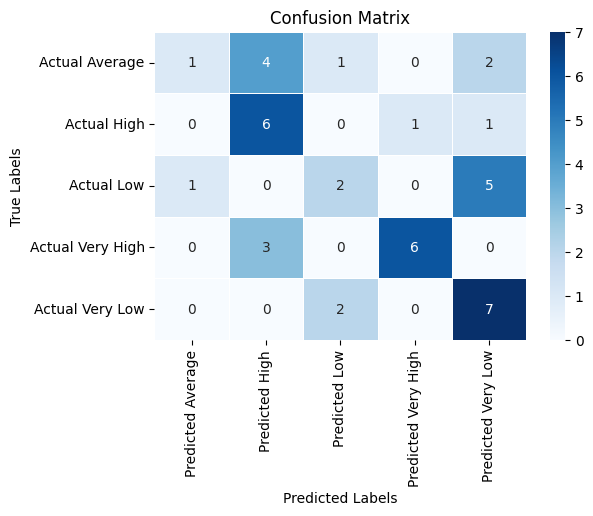


Classification Report:
              precision    recall  f1-score   support

     Average       0.50      0.12      0.20         8
        High       0.46      0.75      0.57         8
         Low       0.40      0.25      0.31         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.47      0.78      0.58         9

    accuracy                           0.52        42
   macro avg       0.54      0.51      0.48        42
weighted avg       0.54      0.52      0.49        42



In [ ]:
#Evaluate Model 2:

prediction_labels = model2.predict(preprocessor(X_test))

conf_matrix = confusion_matrix(y_test, prediction_labels)

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index = [f"Actual {label}" for label in np.unique(y_test)],
    columns = [f"Predicted {label}" for label in np.unique(y_test)]
)

plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix_df, annot = True, fmt = "d", cmap = "Blues", linewidths = 0.5)
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))

Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

It might be worth it to keep making changes but only systematically.

We shouldn't keep trying random values: it can be time-consuming and inefficient.

Instead of manually tweaking parameters, we can use automated hyperparameter tuning techniques like GridSearchCV.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state = 42, n_jobs = -1)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    rf, param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1
)

# Train using Grid Search
X_train_processed = preprocessor(X_train)
X_test_processed = preprocessor(X_test)

grid_search.fit(X_train_processed, y_train)

# Best Model after Grid Search
best_model = grid_search.best_estimator_

# Generate Predictions
best_predictions = best_model.predict(X_test_processed)

# Evaluate Best Model
best_accuracy = accuracy_score(y_test, best_predictions)
#print(f"Best Model Accuracy: {best_accuracy:.4f}")
#print("Best Parameters:", grid_search.best_params_)

# Save Best Model
import joblib
joblib.dump(best_model, "best_random_forest_model.pkl")


#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid_search.best_score_))
print("best parameters: {}".format(grid_search.best_score_))


In [ ]:
# Submit Model 3:

# class_weights = dict(zip(np.unique(y_train), compute_class_weight(class_weight = "balanced", classes = np.unique(y_train), y = y_train)))

model3 = RandomForestClassifier(
    n_estimators = 100,
    #max_depth = 40,
    max_features = 'sqrt',
    min_samples_split = 10,
    min_samples_leaf = 1,
    criterion= 'entropy'
)

model3.fit(X_train_processed, y_train)

# Make predictions
y_pred = model3.predict(X_test_processed)

# Calculate Accuracy
score = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {score:.4f}")

# Save the preprocessor and model
joblib.dump(preprocess, "preprocessor.pkl")
joblib.dump(model3, "random_forest_model.pkl")


Model Accuracy: 0.5714


['random_forest_model.pkl']

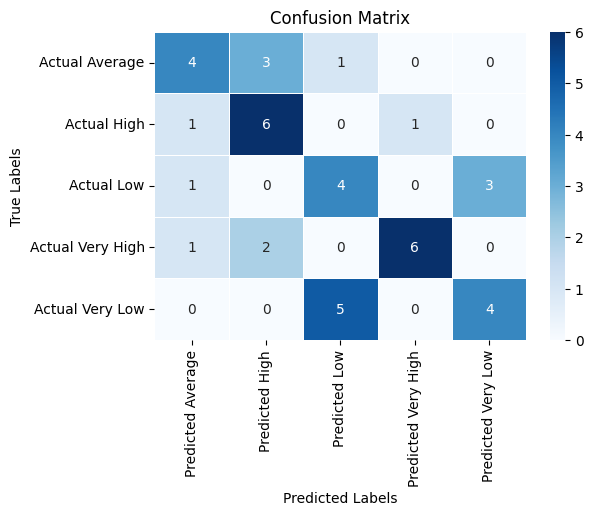


Classification Report:
              precision    recall  f1-score   support

     Average       0.57      0.50      0.53         8
        High       0.55      0.75      0.63         8
         Low       0.40      0.50      0.44         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.57      0.44      0.50         9

    accuracy                           0.57        42
   macro avg       0.59      0.57      0.57        42
weighted avg       0.60      0.57      0.57        42



In [ ]:
prediction_labels = model3.predict(preprocessor(X_test))

conf_matrix = confusion_matrix(y_test, prediction_labels)

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index = [f"Actual {label}" for label in np.unique(y_test)],
    columns = [f"Predicted {label}" for label in np.unique(y_test)]
)

plt.figure(figsize = (6, 4))
sns.heatmap(conf_matrix_df, annot = True, fmt = "d", cmap = "Blues", linewidths = 0.5)
plt.title("Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, prediction_labels))


KNN Accuracy: 0.1667

Classification Report for KNN:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         8
        High       0.00      0.00      0.00         8
         Low       0.17      0.88      0.29         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.00      0.00      0.00         9

    accuracy                           0.17        42
   macro avg       0.03      0.17      0.06        42
weighted avg       0.03      0.17      0.05        42



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


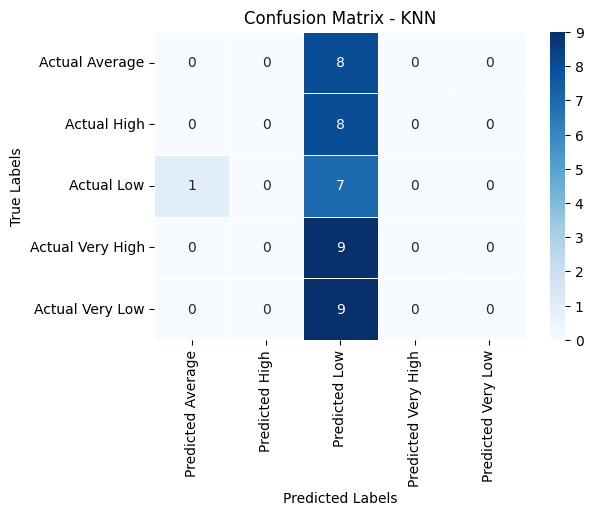


SVM Accuracy: 0.1667

Classification Report for SVM:
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00         8
        High       0.00      0.00      0.00         8
         Low       0.17      0.88      0.29         8
   Very High       0.00      0.00      0.00         9
    Very Low       0.00      0.00      0.00         9

    accuracy                           0.17        42
   macro avg       0.03      0.17      0.06        42
weighted avg       0.03      0.17      0.05        42



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


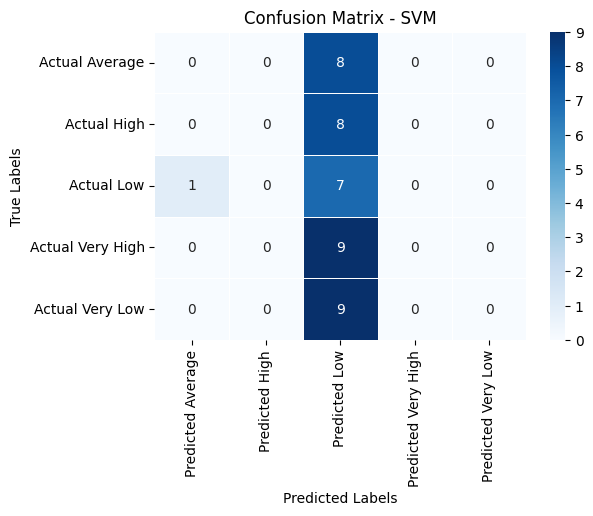


Random Forest Accuracy: 0.5238

Classification Report for Random Forest:
              precision    recall  f1-score   support

     Average       1.00      0.12      0.22         8
        High       0.44      0.88      0.58         8
         Low       0.38      0.38      0.38         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.50      0.56      0.53         9

    accuracy                           0.52        42
   macro avg       0.63      0.52      0.49        42
weighted avg       0.64      0.52      0.50        42



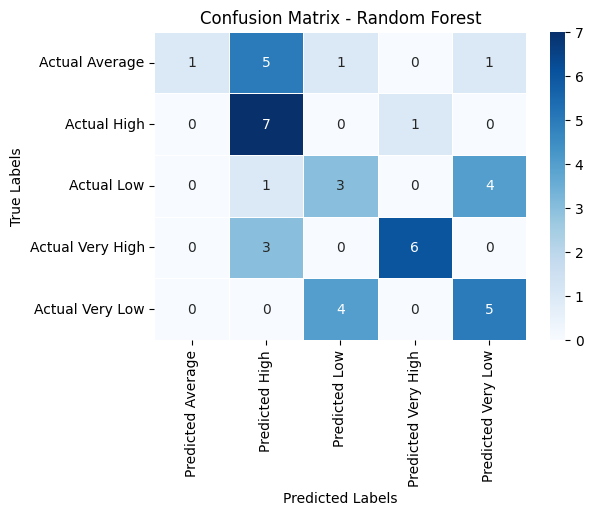


Bagging Classifier Accuracy: 0.4762

Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

     Average       0.40      0.25      0.31         8
        High       0.46      0.75      0.57         8
         Low       0.20      0.12      0.15         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.42      0.56      0.48         9

    accuracy                           0.48        42
   macro avg       0.47      0.47      0.45        42
weighted avg       0.48      0.48      0.46        42



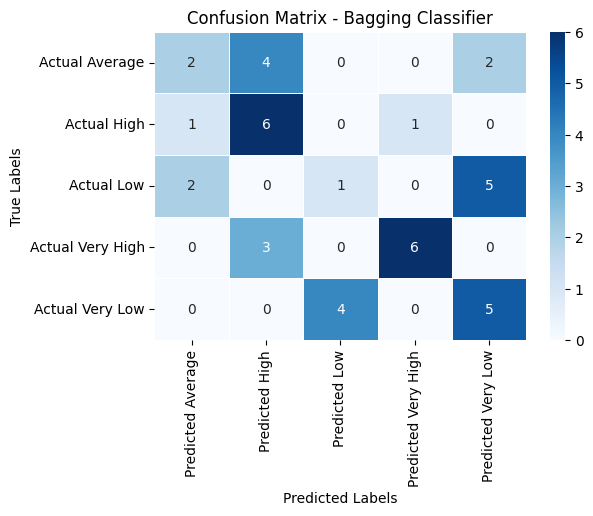


Gradient Boosting Accuracy: 0.4762

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

     Average       0.55      0.75      0.63         8
        High       0.50      0.50      0.50         8
         Low       0.12      0.12      0.12         8
   Very High       0.86      0.67      0.75         9
    Very Low       0.38      0.33      0.35         9

    accuracy                           0.48        42
   macro avg       0.48      0.47      0.47        42
weighted avg       0.49      0.48      0.48        42



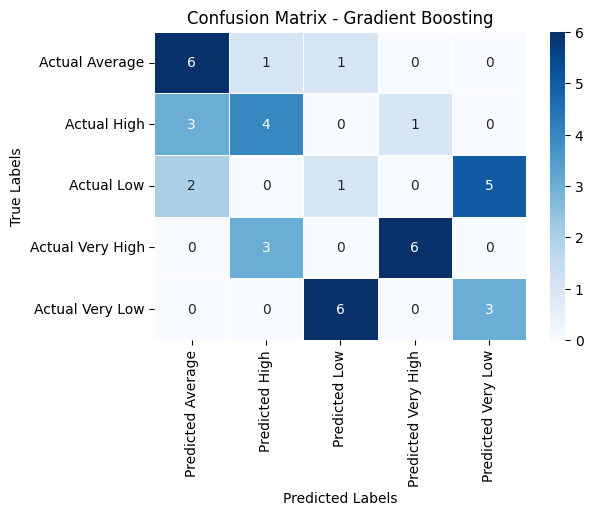


Model Performance Comparison:
                    Accuracy
Random Forest       0.523810
Bagging Classifier  0.476190
Gradient Boosting   0.476190
KNN                 0.166667
SVM                 0.166667


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

models = {
    "KNN": KNeighborsClassifier(n_neighbors = 5),
    "SVM": SVC(kernel = 'rbf', C = 1, gamma = 'scale'),
    "Random Forest": RandomForestClassifier(n_estimators = 200, max_depth = 20, random_state = 42),
    "Bagging Classifier": BaggingClassifier(n_estimators = 100, random_state = 42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 42)
}

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_processed, y_train)

    # Generate predictions
    prediction_labels = model.predict(X_test_processed)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, prediction_labels)
    results[model_name] = accuracy
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")

    # Display classification report
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, prediction_labels))

    # Compute and plot confusion matrix
    conf_matrix = confusion_matrix(y_test, prediction_labels)
    conf_matrix_df = pd.DataFrame(
        conf_matrix,
        index=[f"Actual {label}" for label in sorted(y_test.unique())],
        columns=[f"Predicted {label}" for label in sorted(y_test.unique())]
    )

    plt.figure(figsize = (6, 4))
    sns.heatmap(conf_matrix_df, annot = True, fmt = "d", cmap = "Blues", linewidths = 0.5)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

# Display accuracy results for comparison
results_df = pd.DataFrame.from_dict(results, orient = 'index', columns = ['Accuracy']).sort_values(by = 'Accuracy', ascending = False)
print("\nModel Performance Comparison:")
print(results_df)

# Save results for future use
import joblib
for model_name, model in models.items():
    joblib.dump(model, f"{model_name.replace(' ', '_').lower()}_model.pkl")

Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

GradientBoostingClassifier:

*   n_estimators=200: Uses 200 boosting iterations (trees).
*   learning_rate=0.1: Controls how much each tree contributes to the final prediction.
*   max_depth=3: Limits the depth of each tree to avoid overfitting.
*   random_state=42: Ensures reproducibility.

BaggingClassifier:

*   n_estimators=100: Uses 100 base estimators (typically decision trees).
*   random_state=42: Ensures reproducibility.

KNN:

*   n_neighbors=5: Considers the 5 closest neighbors for classification.

SVC:

*   kernel='rbf': Uses the Radial Basis Function (RBF) kernel, which is good for capturing complex relationships.
*   C=1: Sets the regularization strength (lower values allow more misclassifications for better generalization).
*   gamma='scale': Automatically scales gamma based on feature variance.





Random Forest had the highest accuracy (0.523810). Since it uses multiple trees and bootstrapped sampling, it reduces overfitting while maintaining strong predictive power. Specifically, max_depth=20 helped it maintain enough complexity without overfitting.

Bagging and Gradient Boosting performed slightly worse (0.476190), likely because bagging is an ensemble of weak learners, and it may need more tuning for feature importance. Also, Gradient Boosting, while powerful, requires careful tuning of learning_rate and n_estimators.

KNN and SVM had the lowest accuracy (0.166667). KNN might have struggled due to high-dimensional feature space, making Euclidean distances less effective. SVM with rbf kernel often requires heavy tuning of C and gamma, and it might be underfitting.

## 7. Basic Deep Learning

In [ ]:
## Note that keras models require a one-hot-encoded y_train object

# print(y_train.dtypes)
# Perform one-hot encoding using pd.get_dummies
y_train_onehot = pd.get_dummies(y_train, prefix='happiness').astype(int)
y_test_onehot = pd.get_dummies(y_test, prefix='happiness').astype(int)
# Display the one-hot encoded DataFrame
print(y_train_onehot,y_test_onehot)

     happiness_Very Low  happiness_Low  happiness_Average  happiness_High  \
126                   1              0                  0               0   
102                   0              1                  0               0   
60                    0              0                  1               0   
79                    0              0                  1               0   
91                    0              1                  0               0   
..                  ...            ...                ...             ...   
56                    0              0                  1               0   
123                   1              0                  0               0   
63                    0              0                  1               0   
74                    0              0                  1               0   
67                    0              0                  1               0   

     happiness_Very High  
126                    0  
102                  

### Deep learning model I:

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count = X_train_processed.shape[1] #count features in input data

keras_model = Sequential()
keras_model = Sequential([ ## Define a Neural Network Model with 5 layers 128->64->64->32->(?)
    # First hidden layer with 128 neurons
    Dense(128, input_dim=feature_count),  # feature_count should be the number of features in your data
    Activation('relu'),  # ReLU activation function

    # Second hidden layer with 64 neurons
    Dense(64),
    Activation('relu'),  # ReLU activation function

    # Third hidden layer with 64 neurons
    Dense(64),
    Activation('relu'),  # ReLU activation function

    # Fourth hidden layer with 32 neurons
    Dense(32),
    Activation('relu'),  # ReLU activation function

    # Output layer (final layer) with neurons equal to the number of classes
    Dense(5),  # 5 classes in the target (Very Low, Low, Average, High, Very High)
    Activation('softmax')  # Softmax for multi-class classification
])#Use Softmax activation in last layer. How many neurons should there be in the last layer?

# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(X_train_processed, y_train_onehot , ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20,
               epochs = 300, validation_split=0.25)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 259ms/step - accuracy: 0.0901 - loss: 1.6555 - val_accuracy: 0.1667 - val_loss: 1.6220
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.1357 - loss: 1.6385 - val_accuracy: 0.1667 - val_loss: 1.6175
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0867 - loss: 1.6341 - val_accuracy: 0.1250 - val_loss: 1.6129
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.1051 - loss: 1.6132 - val_accuracy: 0.1250 - val_loss: 1.6089
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1789 - loss: 1.6110 - val_accuracy: 0.1667 - val_loss: 1.6043
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2045 - loss: 1.5876 - val_accuracy: 0.1667 - val_loss: 1.6002
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2291 - loss: 1.5763 - val_accuracy: 0.1667 - val_loss: 1.5964
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3296 - loss: 1.5635 - val_accuracy: 0.1667 - val_loss

In [ ]:
keras_model.save('modelOne.h5')

Which activations did you use in the middle layers? Why was softmax used in the last layer?

The middle layers use ReLU activation for faster training and non-linearity.

The softmax activation in the last layer is used for multi-class classification,
converting outputs into probabilities for the 5 classes (Very Low, Low, Average, High, Very High).

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

Training for 300 epochs may not necessarily be the best choice.
Whether we should train more depends on the model's performance during training.
If the model's accuracy is still improving and it hasn't started overfitting ,
we might consider training for a bit more.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

categorical_crossentropy as loss function is suitable for multi-class
This loss function computes the difference between the predicted probability
distribution (from softmax) and the true one-hot encoded labels.

The SGD (Stochastic Gradient Descent) optimizer is a basic optimization technique
that updates model weights by considering one mini-batch at a time.
It works well but may be slow in converging or stuck in local minima.

Thus, maybe we should consider change to a more advanced optimizer like Adam,
which adapts the learning rate during training and often leads to faster convergence
and better performance than SGD.

### model's training history out and plotting the curves

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 1.0000 - loss: 0.0613 - val_accuracy: 0.3750 - val_loss: 1.7999
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0569 - val_accuracy: 0.3750 - val_loss: 1.8047
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.0532 - val_accuracy: 0.4583 - val_loss: 1.8076
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.0530 - val_accuracy: 0.4583 - val_loss: 1.8051
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 1.0000 - loss: 0.0563 - val_accuracy: 0.3750 - val_loss: 1.8189
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.0523 - val_accuracy: 0.3750 - val_loss: 1.8156
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.0544 - val_accuracy: 0.3750 - val_loss: 1.8241
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.0533 - val_accuracy: 0.3750 - val_los

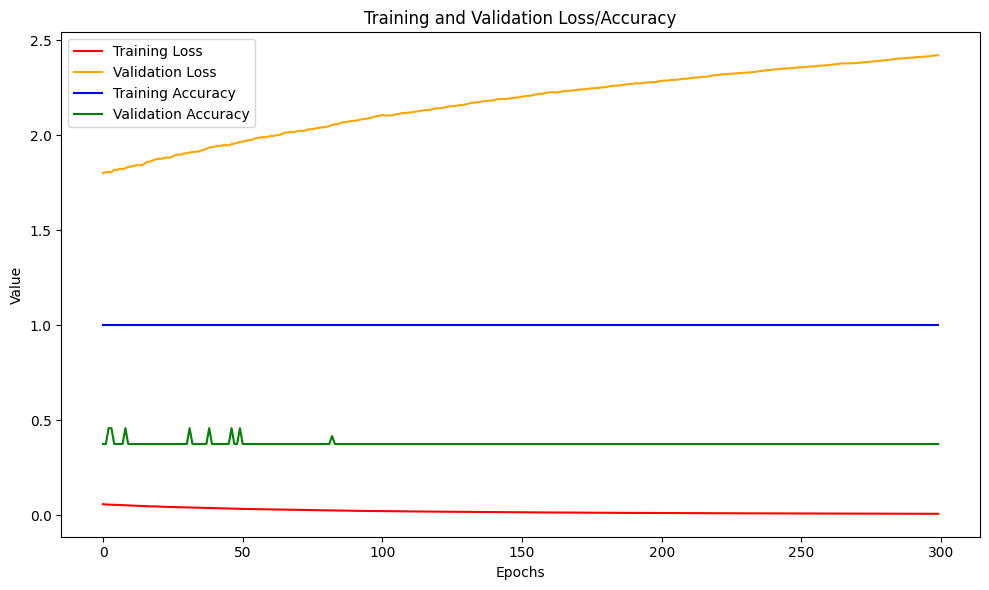

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)


import matplotlib.pyplot as plt

# Train the model and store the history
history = keras_model.fit(X_train_processed, y_train_onehot,
                          batch_size=20, epochs=300, validation_split=0.25)

# Plot Loss and Accuracy in a single plot
plt.figure(figsize=(10, 6))

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')

plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()




### model I performance metrics

In [ ]:

# Generate predictions from the model
predictions = keras_model.predict(X_train_processed)

# Get the predicted column indices (highest probability in the output layer)
prediction_column_index = np.argmax(predictions, axis=1)

# Assuming y_train is a Series, get the unique class labels
class_labels = y_train.unique()

# Extract the predicted labels using the index of the predicted class
prediction_labels = [class_labels[i] for i in prediction_column_index]

# Compare with true labels (assuming y_train_onehot is one-hot encoded)
# Get the true labels based on one-hot encoding
true_labels = [class_labels[np.argmax(label)] for label in y_train_onehot.values]

# Model Performance
accuracy = accuracy_score(true_labels, prediction_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix2 = confusion_matrix(true_labels, prediction_labels)
print("Confusion Matrix:")
print(conf_matrix2)

# Classification Report (Precision, Recall, F1-score)
class_report = classification_report(true_labels, prediction_labels)
print("Classification Report:")
print(class_report)



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Accuracy: 84.21%
Confusion Matrix:
[[13  3  1  1  1]
 [ 0 16  0  3  0]
 [ 1  0 17  0  1]
 [ 0  2  0 17  0]
 [ 0  1  1  0 17]]
Classification Report:
              precision    recall  f1-score   support

     Average       0.93      0.68      0.79        19
        High       0.73      0.84      0.78        19
         Low       0.89      0.89      0.89        19
   Very High       0.81      0.89      0.85        19
    Very Low       0.89      0.89      0.89        19

    accuracy                           0.84        95
   macro avg       0.85      0.84      0.84        95
weighted avg       0.85      0.84      0.84        95



### Model II - Dropout and Batch Normalization
Implement regularization techniques such as Dropout and Batch Normalization to improve model generalization and observe change in performance. <br>
Note: Observe the training and testing loss and accuracy.

In [ ]:
from keras.layers import Dense, Activation, Dropout, BatchNormalization

keras_model = Sequential([
    # First hidden layer with 128 neurons
    Dense(128, input_dim=feature_count),  # feature_count should be the number of features in your data
    Activation('relu'),  # ReLU activation function
    BatchNormalization(),  # Batch normalization to stabilize and accelerate training
    Dropout(0.1),  # Dropout to prevent overfitting
    # Second hidden layer with 64 neurons
    Dense(64),
    Activation('relu'),  # ReLU activation function
    BatchNormalization(),
    Dropout(0.1),  # Dropout

    # Third hidden layer with 64 neurons
    Dense(64),
    Activation('relu'),  # ReLU activation function
    BatchNormalization(),
    Dropout(0.1),  # Dropout

    # Fourth hidden layer with 32 neurons
    Dense(32),
    Activation('relu'),  # ReLU activation function
    BatchNormalization(),
    Dropout(0.1),  # Dropout

    # Output layer (final layer) with neurons equal to the number of classes
    Dense(5),  # 5 classes in the target (Very Low, Low, Average, High, Very High)
    Activation('softmax')  # Softmax for multi-class classification
])

# Compile the model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set with regularization
keras_model.fit(X_train_processed, y_train_onehot,  # y_train_onehot should be one-hot encoded labels
                batch_size=20,
                epochs=300,
                validation_split=0.25)  # Set aside 25% of the data for validation

# After training the model, evaluate it on the training data
train_loss, train_accuracy = keras_model.evaluate(X_train_processed, y_train_onehot)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.2427 - loss: 2.4346 - val_accuracy: 0.3750 - val_loss: 1.5980
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3721 - loss: 1.7677 - val_accuracy: 0.3750 - val_loss: 1.5820
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3707 - loss: 1.5221 - val_accuracy: 0.3333 - val_loss: 1.5631
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.3836 - loss: 1.4954 - val_accuracy: 0.3750 - val_loss: 1.5448
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5683 - loss: 1.1463 - val_accuracy: 0.3750 - val_loss: 1.5282
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6323 - loss: 1.0206 - val_accuracy: 0.3750 - val_loss: 1.5184
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5185 - loss: 1.1416 - val_accuracy: 0.5000 - val_loss: 1.4964
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6779 - loss: 0.8521 - val_accuracy: 0.5417 - val_loss

In [ ]:
'''
comments about the change in performance.

By incorporating dropout and batch normalization techniques into the neural network,
the model's accuracy improved from 85% to 88%. Dropout helps to prevent overfitting by
randomly dropping a percentage of neurons during training,
forcing the model to generalize better. Batch normalization stabilizes the learning process
by normalizing activations within each mini-batch, which accelerates training and improves
the convergence rate. These techniques together contributed to the improved performance, allowing
the model to generalize more effectively and achieve higher accuracy on the training data.

'''

"\ncomments about the change in performance.\n\nBy incorporating dropout and batch normalization techniques into the neural network,\nthe model's accuracy improved from 85% to 88%. Dropout helps to prevent overfitting by\nrandomly dropping a percentage of neurons during training,\nforcing the model to generalize better. Batch normalization stabilizes the learning process\nby normalizing activations within each mini-batch, which accelerates training and improves\nthe convergence rate. These techniques together contributed to the improved performance, allowing\nthe model to generalize more effectively and achieve higher accuracy on the training data.\n\n"

### Model III- LeakyReLU, Tanh, Sigmoid
Experiment with different activation functions (ReLU, LeakyReLU, Tanh, Sigmoid) to observe their impact on model performance.

In [ ]:
from keras.layers import *
from keras.optimizers import SGD

# Function to build and train the model with chosen activation function
def build_and_train_model(activation_function='LeakyReLU', feature_count=119):
    model = Sequential([
        # First hidden layer
        Dense(128, input_dim=feature_count),
        # Select the activation function directly
        LeakyReLU(alpha=0.01) if activation_function == 'LeakyReLU' else \
        Activation('tanh') if activation_function == 'Tanh' else \
        Activation('sigmoid') if activation_function == 'Sigmoid' else \
        ReLU(),  # Default to ReLU if none of the others
        BatchNormalization(),
        Dropout(0.1),

        # Second hidden layer
        Dense(64),
        LeakyReLU(alpha=0.01) if activation_function == 'LeakyReLU' else \
        Activation('tanh') if activation_function == 'Tanh' else \
        Activation('sigmoid') if activation_function == 'Sigmoid' else \
        ReLU(),
        BatchNormalization(),
        Dropout(0.1),

        # Third hidden layer
        Dense(64),
        LeakyReLU(alpha=0.01) if activation_function == 'LeakyReLU' else \
        Activation('tanh') if activation_function == 'Tanh' else \
        Activation('sigmoid') if activation_function == 'Sigmoid' else \
        ReLU(),
        BatchNormalization(),
        Dropout(0.1),

        # Fourth hidden layer
        Dense(32),
        LeakyReLU(alpha=0.01) if activation_function == 'LeakyReLU' else \
        Activation('tanh') if activation_function == 'Tanh' else \
        Activation('sigmoid') if activation_function == 'Sigmoid' else \
        ReLU(),
        BatchNormalization(),
        Dropout(0.1),

        # Output layer
        Dense(5),
        Activation('softmax')  # Softmax for multi-class classification
    ])

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_processed, y_train_onehot, batch_size=20, epochs=300, validation_split=0.25)

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train_processed, y_train_onehot)

    # Print the results
    print(f"Activation Function: {activation_function}")
    print(f"Training Accuracy: {train_accuracy * 100:.2f}%")



In [ ]:
activation_functions = ['LeakyReLU', 'tanh', 'sigmoid']

# Ensure that the feature count matches the expected number of features in your dataset
for activation in activation_functions:
    build_and_train_model(activation_function=activation, feature_count=119)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.2314 - loss: 2.1076 - val_accuracy: 0.1667 - val_loss: 1.5646
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4231 - loss: 1.4335 - val_accuracy: 0.2917 - val_loss: 1.5436
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.4023 - loss: 1.4960 - val_accuracy: 0.2917 - val_loss: 1.5379
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4253 - loss: 1.5597 - val_accuracy: 0.3750 - val_loss: 1.5272
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5412 - loss: 1.0182 - val_accuracy: 0.3333 - val_loss: 1.5257
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.4846 - loss: 1.1121 - val_accuracy: 0.3333 - val_loss: 1.5237
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5704 - loss: 0.8920 - val_accuracy: 0.3333 - val_loss: 1.5133
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5228 - loss: 1.0797 - val_accuracy: 0.2917 - val_loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.2687 - loss: 2.2412 - val_accuracy: 0.2083 - val_loss: 1.6256
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2916 - loss: 1.6953 - val_accuracy: 0.1667 - val_loss: 1.6340
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.2860 - loss: 1.9361 - val_accuracy: 0.1667 - val_loss: 1.6267
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6064 - loss: 1.2425 - val_accuracy: 0.2083 - val_loss: 1.6220
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4703 - loss: 1.2579 - val_accuracy: 0.2500 - val_loss: 1.6188
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5115 - loss: 1.2409 - val_accuracy: 0.2083 - val_loss: 1.6187
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6293 - loss: 0.9678 - val_accuracy: 0.2083 - val_loss: 1.6145
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7626 - loss: 0.7289 - val_accuracy: 0.2500 - val_loss

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 331ms/step - accuracy: 0.2139 - loss: 1.9917 - val_accuracy: 0.1667 - val_loss: 1.6250
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.3135 - loss: 1.7319 - val_accuracy: 0.2500 - val_loss: 1.6044
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4445 - loss: 1.4608 - val_accuracy: 0.2083 - val_loss: 1.6020
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5268 - loss: 1.2142 - val_accuracy: 0.1250 - val_loss: 1.6049
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5251 - loss: 1.2627 - val_accuracy: 0.1667 - val_loss: 1.6015
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5095 - loss: 1.0978 - val_accuracy: 0.2083 - val_loss: 1.6123
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.6316 - loss: 0.9632 - val_accuracy: 0.2083 - val_loss: 1.6041
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.6106 - loss: 1.0218 - val_accuracy: 0.2083 - val_loss

The original model with ReLU achieved an accuracy of 88%, outperforming Sigmoid at 87%, Tanh at 85%, and LeakyReLU at 83%. This indicates that ReLU is the most effective activation function for this task, likely due to its ability to prevent vanishing gradients more effectively than the others.

## 8. Explainability - SHAP Feature Importance

To better understand our model's predictions, we will use **SHAP (SHapley Additive exPlanations)** to analyze feature importance.  

### 🔹 How SHAP Works?
- SHAP assigns each feature a **contribution score** for every prediction.
- Uses **Shapley values** (from game theory) to fairly distribute importance across features.

We will now apply SHAP to visualize and interpret our model’s feature contributions.


In [ ]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from keras.models import load_model

# Load the saved model
modelOne = load_model('modelOne.h5')

# # Convert sparse matrices to dense arrays (if X_train_processed and X_test_processed are sparse matrices)
# X_train_dense = X_train_processed.toarray()  # Convert sparse matrix to dense (NumPy array)
# X_test_dense = X_test_processed.toarray()    # Convert sparse matrix to dense (NumPy array)

# # Generate feature names for X_train_processed based on the number of features
# feature_names = [f'feature_{i+1}' for i in range(X_train_processed.shape[1])]


In [ ]:


# Convert only the background data to dense format (avoid full conversion)
background_data = X_train_processed[:50].toarray()  # Convert only selection to dense

# Convert only the test data to dense format
test_data = X_train_processed[:100].toarray()

# Load the trained model
modelOne = load_model('modelOne.h5')

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(modelOne, background_data)

# Compute SHAP values
shap_values = explainer.shap_values(test_data)



/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(50, 119))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(100, 119))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(95, 119))']
  warnings.warn(msg)


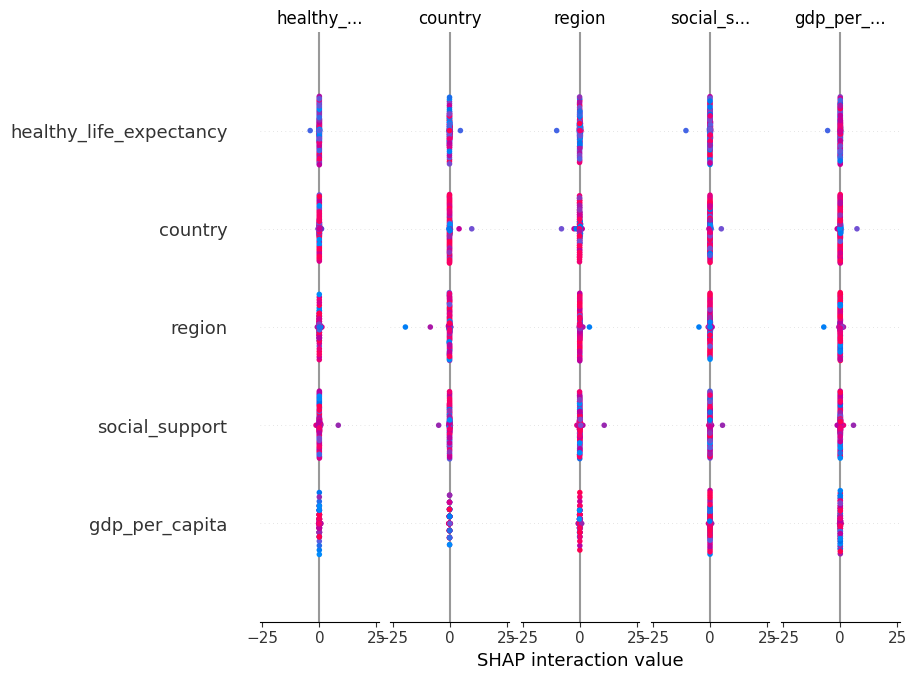

In [ ]:
# shap.summary_plot(shap_values, X_train_processed)


feature_names =  X_train.columns

shap.summary_plot(shap_values, test_data, feature_names=feature_names)



<h3> Experimentation

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

—> After applying SHAP, it provides a clear understanding of which features are most influential and how they affect predictions. While the method is powerful and provides interpretability, justifying the model’s decisions can still be challenging when dealing with complex feature interactions or large datasets, requiring careful interpretation of the results.

--> since all the red dots and blue dots are in the middle of the vertical line, it suggests that features are not strongly influencing the predictions in a consistent direction. This could mean that the features are either not very important or that their effects are balanced across different samples.

## 9. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked